# Quest 2 : Shark Attacks


### Dream Team:

- <em>Karina</em>
- <em>Pollyana</em>
- <em>Salim</em>
- <em>Jules</em>

# Introoduction

As an insurance company we want to analyze shark attack statistics in order to evaluate and assess the incidence rates based on various features and factors

This analysis can help determine premium rates based on the likelihood of shark-related incidents.



Business goal



Develop a fair method to determine insurance rates for shark attack coverage using data from shark attack incidents

Hypothesis

The easiest way to get attacked by a shark is by certain type of activity

Shark attacks occur more frequently in certain countries

The severity of injuries during a shark attack is positively correlated with higher insurance rates

## <font color='DarkBlue'>I. <ins>Prerequisites</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins>Identifying the dataset source</ins>: <font color='violet'></font>

<ins><strong>Data Source: </strong></ins>

In [3]:
sharks = "GSAF5.xls"

In [4]:
source = sharks

### <font color='MediumBlue'>2 - <ins> Importing libraries</ins>: <font color='violet'></font>

<strong>pandas</strong>

In [5]:
import pandas as pd
import numpy as np
import datetime as dt

### <font color='MediumBlue'>3 - <ins>  Loading the dataset into a DataFrame</ins>: <font color='violet'></font>

In [6]:
df = pd.read_excel(source)

##  <font color='DarkBlue'>II. <ins>Exploring the Dataset</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins> Dataset Overview</ins>: <font color='violet'></font>

#### <font color='CornflowerBlue'>a) Displaying number of rows and number of columns: </font>

In [7]:
df.shape

(6947, 23)

#### <font color='CornflowerBlue'>b) Glancing at the dataset: </font>

<ins><strong>Displaying the first rows : </strong></ins>

In [8]:
df.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,08 Dec-2023,2023.0,Unprovoked,AUSTRALIA,Queensland,1770,Swimming,malle,20s,NaN,...,NaN,"B. Myatt, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Dec-2023,2023.0,Unprovoked,BAHAMAS,New Providence Isoad,Sandals Resort,Paddle boarding,Lauren Erickson Van Wart,F,44,...,NaN,"NBC News, 12/4/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Dec-2023,2023.0,Unprovoked,MEXICO,Jalisco,San Patricio Melaque,Swimming,Maria Fernandez Martinez Jimenez,F,26,...,NaN,"News Channel 21, 12/3.2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30 Nov-2023,2023.0,Unprovoked,AUSTRALIA,Queensland,Clack Island,Swimming,Matthew Davitt,M,21,...,1.8m bull shark,"ABC Net, 11/30/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21 Nov-2023,2023.0,Unprovoked,BAHAMAS,Grand Bahama Island,Tiger Beach,Scuba diving,female,F,47,...,NaN,"Eye Witness News, 11/22/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ins><strong>Displaying names and culumns type : </strong></ins>

In [9]:
df.dtypes

Date               object
Year              float64
Type               object
Country            object
State              object
Location           object
Activity           object
Name               object
Sex                object
Age                object
Injury             object
Unnamed: 11        object
Time               object
Species            object
Source             object
pdf                object
href formula       object
href               object
Case Number        object
Case Number.1      object
original order    float64
Unnamed: 21        object
Unnamed: 22        object
dtype: object

<ins><strong>Displaying number of unique values for each column : </strong></ins>

In [10]:
df.nunique()

Date              5983
Year               258
Type                11
Country            224
State              896
Location          4495
Activity          1585
Name              5669
Sex                  9
Age                243
Injury            4071
Unnamed: 11         12
Time               409
Species           1671
Source            5284
pdf               6789
href formula      6785
href              6776
Case Number       6777
Case Number.1     6775
original order    6797
Unnamed: 21          1
Unnamed: 22          2
dtype: int64

<ins><strong>Displaying number of unique values for each column that has less than 10 distinct values : </strong></ins>

In [11]:
df.nunique()[lambda x: x <= 10]

Sex            9
Unnamed: 21    1
Unnamed: 22    2
dtype: int64

#### <font color='CornflowerBlue'>c) Displaying unique values for each column that has less than 10 distinct value:</font>

In [12]:
dico = {}
for i in range(len(df.columns)):
    if df.nunique()[i] <= 10:
        dico[df.columns[i]] = df.nunique()[i]
        
for j in dico.keys():
    print(j,":",df[j].unique())

Sex : ['20s' 'F' 'M' nan ' M' 'M ' 'lli' 'M x 2' 'N' '.']
Unnamed: 21 : [nan 'stopped here']
Unnamed: 22 : [nan 'Teramo' 'change filename']


### <font color='MediumBlue'>2 - <ins> Identifying numerical variables and their specifications</ins>: <font color='violet'></font>

<ins><strong><font color='BlueViolet'>Numerical</font></strong> **variables specifications**:</ins>

From the data types output it is safe to assume that the following columns are numerical variables: 
- **Year**: <em><font color='DarkMagenta'> float64</font></em>
- **original order**: <em><font color='DarkMagenta'> float64</font></em>

However, all remaining columns shouldn't be necessary considered as categorical variables.
Indeed, based on the name of the following columns and their values, these are numerical variables in nature:

- **Age**:<font color='red'> should be</font> <em><font color='DarkMagenta'>int</font></em>
- **Date**:<font color='red'> should be</font><em><font color='DarkMagenta'> Date</font></em>
- **Time**:<font color='red'> should be</font><em><font color='DarkMagenta'> Date</font></em>



Additionally, here are the following actions that can be suggested to "fix" some of the data discrepancies:
- Modify "Date" type and format
- Change "Year" type to int
- Deal with missing values such as "Sex"
- Address outliers (?)

In [13]:
#renaming variables: everything in lower case and replacing spaces levaring fix_col_names function

def fix_col_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(r'\s+','_',regex=True)
    return df

fix_col_names(df)

# example df.rename(columns= {'foo': 'bar'}, inplace=True)



,date,year,type,country,state,location,activity,name,sex,age,...,species,source,pdf,href_formula,href,case_number,case_number.1,original_order,unnamed:_21,unnamed:_22
0,08 Dec-2023,2023.0,Unprovoked,AUSTRALIA,Queensland,1770,Swimming,malle,20s,NaN,...,NaN,"B. Myatt, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Dec-2023,2023.0,Unprovoked,BAHAMAS,New Providence Isoad,Sandals Resort,Paddle boarding,Lauren Erickson Van Wart,F,44,...,NaN,"NBC News, 12/4/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Dec-2023,2023.0,Unprovoked,MEXICO,Jalisco,San Patricio Melaque,Swimming,Maria Fernandez Martinez Jimenez,F,26,...,NaN,"News Channel 21, 12/3.2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30 Nov-2023,2023.0,Unprovoked,AUSTRALIA,Queensland,Clack Island,Swimming,Matthew Davitt,M,21,...,1.8m bull shark,"ABC Net, 11/30/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21 Nov-2023,2023.0,Unprovoked,BAHAMAS,Grand Bahama Island,Tiger Beach,Scuba diving,female,F,47,...,NaN,"Eye Witness News, 11/22/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Changing Age type

# df['age'] = df['age'].apply(float)

#### <font color='CornflowerBlue'>a) Continuous variables: </font>

In [15]:
cont_var = ['age', 'year'] #Age object -> int, Year  float64 -> int


#### <font color='CornflowerBlue'>b) Discrete variables: </font>

In [16]:
disc_var = ['date','time', 'original_order']     # None for this dataset, Time   object -> datetime, Date:  object 

#### <font color='CornflowerBlue'>c) All numerical variables: </font>

In [17]:
num_var = disc_var + cont_var

### <font color='MediumBlue'>3 - <ins> Identifying categorical variables and their specifications</ins>: <font color='violet'></font>

<strong><font color='BlueViolet'>Categorical</font></strong> **variables specification**:

- **xxx**: <ins><em><font color='DarkMagenta'>Nominal</font></em></ins>.There is no obvious order for that variable.
- **xx**:<ins><em><font color='DarkMagenta'>Nominal</font></em></ins>.There is no obvious order for that variable.
- **xxx**: <ins><em><font color='DarkMagenta'>Nominal</font></em></ins>. This is a boolean like variable with no particular order. 
- **xxx**: <ins><em><font color='DarkMagenta'>Nominal</font></em></ins>.This is a boolean like variable with no particular order.
- **xxx**: <ins><em><font color='DarkMagenta'>Ordinal</font></em></ins>.Clearly, we can order the level of education, for example by ascending order.



####  <font color='CornflowerBlue'>a) Nominal variables: </font>

In [18]:
nom_var = ['type','country','state','location','activity','name','sex','injury','species','source']

#### <font color='CornflowerBlue'>b) Ordinal variables:</font>

In [19]:
ord_var = []

####  <font color='CornflowerBlue'>c) All categorical variables:</font>

In [20]:
cat_var = nom_var + ord_var

## <font color='DarkBlue'>III. <ins>Analysing Descriptive Statistics</ins>: <font color='blue'></font>

In [21]:
# Number of missing values for each column
df.isna().sum()


date                25
year                27
type                43
country             75
state              506
location           589
activity           610
name               244
sex                604
age               3016
injury              60
unnamed:_11        586
time              3547
species           3153
source              44
pdf                148
href_formula       128
href               151
case_number        149
case_number.1      150
original_order     148
unnamed:_21       6946
unnamed:_22       6945
dtype: int64

In [22]:
# pourcentage of missing values for each column
df.isna().sum()/df.shape[0]*100

date               0.359868
year               0.388657
type               0.618972
country            1.079603
state              7.283720
location           8.478480
activity           8.780769
name               3.512307
sex                8.694400
age               43.414423
injury             0.863682
unnamed:_11        8.435296
time              51.058011
species           45.386498
source             0.633367
pdf                2.130416
href_formula       1.842522
href               2.173600
case_number        2.144811
case_number.1      2.159205
original_order     2.130416
unnamed:_21       99.985605
unnamed:_22       99.971211
dtype: float64

In [23]:
# Importing a module for missing values visualization
import missingno as msno

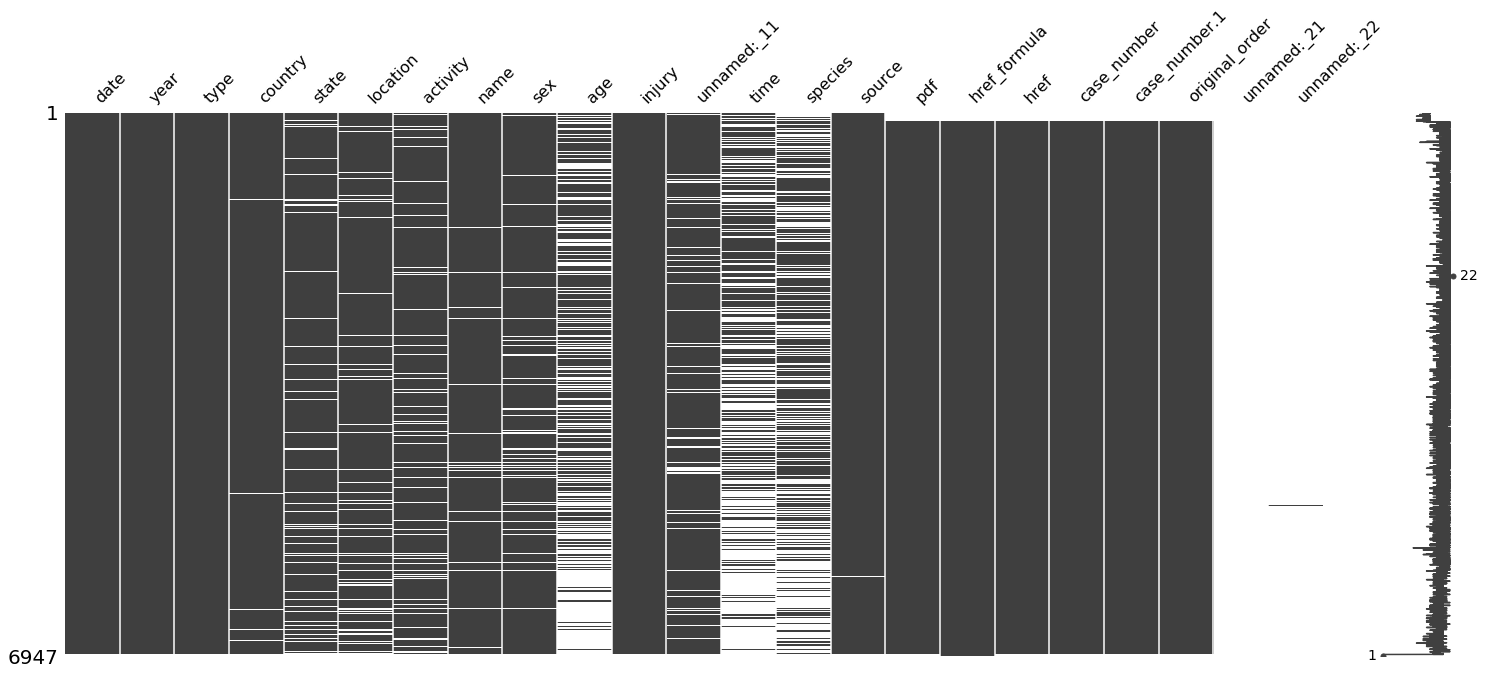

In [24]:
# Visualize missing values as a matrix
msno.matrix(df) 

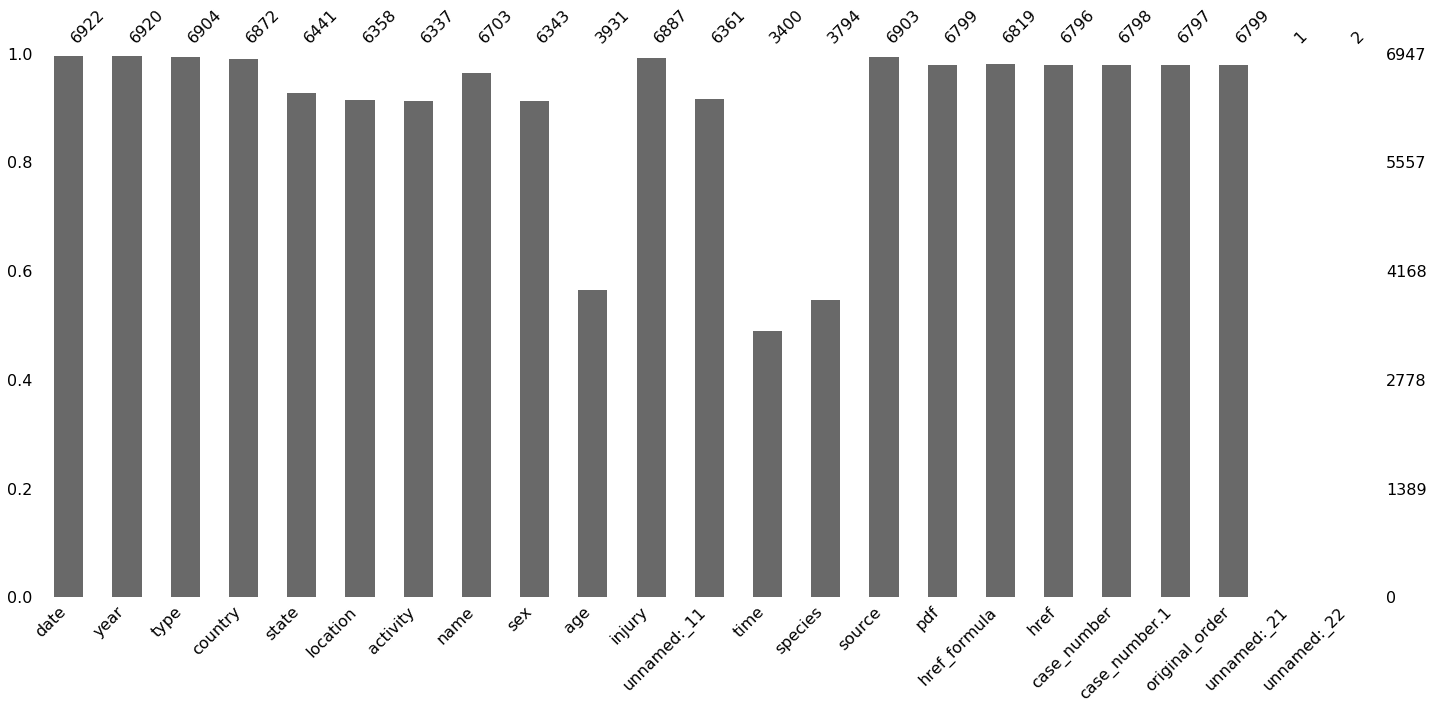

In [25]:
# Visualize the number of missing. values as a bar chart
msno.bar(df) 

### <font color='MediumBlue'>1 - <ins> Analysing numerical variables</ins>: <font color='violet'></font>

#### <font color='CornflowerBlue'>a) Measuring Central Tendencies: <font color='violet'></font> 

#### i) <font color='ForestGreen'>Mean</font>

In [26]:
df[num_var].mean().round(2)

original_order    3401.15
year              1934.12
dtype: float64

#### ii)  <font color='ForestGreen'>Median</font>

In [27]:
df[num_var].median()

original_order    3401.0
year              1985.0
dtype: float64

#### iii)  <font color='ForestGreen'>Mode</font>

In [28]:
df[num_var].mode()

,date,time,original_order,age,year
0,1957,Afternoon,569.0,16,2015.0
1,NaN,NaN,6369.0,19,NaN


**Findings on central tendencies**

Based on our calculations and interpretations of central measures, we can make the following observations:

 

#### <font color='CornflowerBlue'>b) Measuring Dispersion:</font> 

#### i) <font color='ForestGreen'>Standard Deviation</font>

In [29]:
df[num_var].std().round(2)

original_order    1963.08
year               273.31
dtype: float64

* **xxxx**: The Standard Deviation blablabla



#### ii) <font color='ForestGreen'>Range</font>

In [30]:
df[num_var].max() - df[num_var].min()

original_order    6800.0
year              2023.0
dtype: float64

#### <font color='CornflowerBlue'>c)  Summarizing Statistics:</font> 

#### <font color='ForestGreen'> i) Statistics Summary: count, mean, standard deviation, min, quartiles, maximum</font>

In [31]:
df[num_var].describe().round(2)

,original_order,year
count,6799.00,6920.00
mean,3401.15,1934.12
std,1963.08,273.31
min,2.00,0.00
25%,1701.50,1947.00
50%,3401.00,1985.00
75%,5100.50,2009.00
max,6802.00,2023.00


### <font color='MediumBlue'>2 - <ins> Analysing categorical variables</ins>: <font color='violet'></font>

#### <font color='CornflowerBlue'>a) Measuring Frequency: </font>

#### <font color='ForestGreen'> i) frequency in counts</font>

In [32]:
for k in cat_var:
    print(f"{df[k].value_counts()} \n")    

Unprovoked             5091
Provoked                633
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             20
Boat                      7
Unverified                1
Unconfirmed               1
?                         1
Under investigation       1
Name: type, dtype: int64 

USA                 2535
AUSTRALIA           1474
SOUTH AFRICA         596
NEW ZEALAND          143
PAPUA NEW GUINEA     136
                    ... 
RED SEA                1
SUDAN?                 1
JAVA                   1
FALKLAND ISLANDS       1
ROATAN                 1
Name: country, Length: 224, dtype: int64 

Florida                                       1178
New South Wales                                520
Queensland                                     346
Hawaii                                         338
California                                     323
                                              ... 
On the Kowloon penisula, south of Sai Kun

#### <font color='ForestGreen'> ii) frequency in percentages</font>

In [33]:
for k in cat_var:
    percentage = (df[k].value_counts() / df.shape[0]) * 100
    print(f"{percentage} \n ")

Unprovoked             73.283432
Provoked                9.111847
Invalid                 7.945876
Watercraft              5.110119
Sea Disaster            3.483518
Questionable            0.287894
Boat                    0.100763
Unverified              0.014395
Unconfirmed             0.014395
?                       0.014395
Under investigation     0.014395
Name: type, dtype: float64 
 
USA                 36.490571
AUSTRALIA           21.217792
SOUTH AFRICA         8.579243
NEW ZEALAND          2.058442
PAPUA NEW GUINEA     1.957680
                      ...    
RED SEA              0.014395
SUDAN?               0.014395
JAVA                 0.014395
FALKLAND ISLANDS     0.014395
ROATAN               0.014395
Name: country, Length: 224, dtype: float64 
 
Florida                                       16.956960
New South Wales                                7.485245
Queensland                                     4.980567
Hawaii                                         4.865410
Califor